In [1]:
from os import path
import matplotlib.pyplot as plt
import numpy as np
from backbone.mix_k_dihedral import MixPlot2
big_traj_folder = '/home/ytcdata/bigtraj_fluctmatch/500ns'
dihedral_folder = '/home/yizaochen/Documents/dna_2021_drawzone/backbone_dihedral'
backbone_data_folder = '/home/yizaochen/codes/dna_rna/backbone_data'
drawzone_folder = '/home/yizaochen/Desktop/drawzone_temp'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
strand_id = 'STRAND1'
make_df = False
make_dihedral = False
make_epsilon_minus_zeta_df = False
plot_agent = MixPlot2(host, strand_id, big_traj_folder, dihedral_folder, backbone_data_folder, make_df)

/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer exists
/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer/STRAND1 exists
/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer/STRAND1/ndx exists
/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer/STRAND1/plumed_input exists
/home/yizaochen/codes/dna_rna/backbone_data/a_tract_21mer/STRAND1/plumed_out exists
/home/yizaochen/codes/backbone_rigidity/plumed_test/a_tract_21mer exists


### Part 2: Make/Read DataFrame

In [3]:
if make_df:
    plot_agent.make_k_df()
else:
    plot_agent.read_k_df()
    
if make_dihedral:
    plot_agent.make_all_dihedral_df()
else:
    plot_agent.read_all_diehdral_df()
    
if make_epsilon_minus_zeta_df:
    plot_agent.make_epsilon_minus_zeta_df()
else:
    plot_agent.read_epsilon_minus_zeta_df()

### Part 3: Get a selected Resid and selected type k

In [4]:
plot_agent.df_k

,C2'(i)-P(i+1),C2'(i)-O1P(i+1),C4'(i)-O5'(i+1)
0,2.485653,3.161242,4.248058
1,3.277126,1.463537,5.011947
2,3.083668,2.626089,5.428947
3,2.965742,2.580100,5.553047
4,2.535542,3.560937,5.846668
5,3.050537,2.966100,5.906837
6,3.045589,3.123874,5.664826
7,2.902274,3.261553,6.319000
8,2.490042,3.923253,6.322826
9,2.453216,3.687305,6.216300


In [6]:
plot_agent.df_k.iloc[0].sum()

9.894952631579715

In [8]:
n_bp = 14
d_k_ef_container = {'STRAND1': np.zeros(n_bp), 'STRAND2': np.zeros(n_bp)}
for idx in range(n_bp):
    d_k_ef_container[strand_id][idx] = plot_agent.df_k.iloc[idx].sum()

In [9]:
d_k_ef_container[strand_id]

array([ 9.89495263,  9.75261053, 11.13870526, 11.09888947, 11.94314737,
       11.92347368, 11.83428947, 12.48282632, 12.73612105, 12.35682105,
       12.16643158, 10.30528421,  9.49869474,  8.46211579])

### Batch Drawing

In [ ]:
hosts = ['a_tract_21mer', 'g_tract_21mer', 'atat_21mer', 'gcgc_21mer']
strands = ['STRAND1', 'STRAND2']
make_df = False
make_dihedral = False
make_epsilon_minus_zeta_df = False

for host in hosts:
    for strand_id in strands:
        plot_agent = MixPlot2(host, strand_id, big_traj_folder, dihedral_folder, backbone_data_folder, make_df)
        
        if make_df:
            plot_agent.make_k_df()
        else:
            plot_agent.read_k_df()

        if make_dihedral:
            plot_agent.make_all_dihedral_df()
        else:
            plot_agent.read_all_diehdral_df()

        if make_epsilon_minus_zeta_df:
            plot_agent.make_epsilon_minus_zeta_df()
        else:
            plot_agent.read_epsilon_minus_zeta_df()
            
        figsize = (6, 12)
        hspace = 0
        bottom = 0 
        top = 6.0
        fig, d_axes = plot_agent.plot_main(figsize, hspace, bottom, top)
        png_out = path.join(drawzone_folder, f'{host}_{strand_id}.png')
        plt.tight_layout()
        plt.savefig(png_out, dpi=100)
        plt.show()

### Addtional Part: Data Matrix Max, Min

In [7]:
plot_agent.get_data_mat_min_max()

C2'-C3'-O3'-P
Min: 0.0 Max: 0.029
epsilon - zeta:
Min: 0.0 Max: 0.022


### Additional Part: Test Maximum

In [21]:
idx = 2
ylim = d_axes[idx].get_ylim()
print(f'Min: {ylim[0]:.3f}')
print(f'Max: {ylim[1]:.3f}')

Min: 2.665
Max: 6.763


### Additional Part : Color Bar

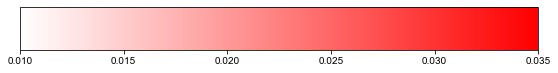

In [9]:
figsize = (8,4)
dihedral_name = "C2prime-P" #"C2prime-P", "C4prime-P", "C3prime-O5prime", "epsilon-zeta"
fig, ax1, cb1  = plot_agent.draw_color_bar(figsize, dihedral_name)
plt.show()